In [ ]:
'''
Introdução à Econometria - Uma abordagem moderna (Tradução da 6 edição norte-americana)
Autor: WOOLDRIDGE, J. M.
Editora: CENGAGE LEARNING

Cap. 6: Análise de regressão múltipla: problemas adicionais (Multiple Regression Analysis: Further Issues)
Item 6.2b: Modelos com funções quadráticas
             (MODELS WITH QUADRATICS)
             
Arquivo com os dados: wage1.xls

Arquivo com dados em:
http://students.cengage.com.br/dashboard/private/livroView.jsf;jsessionid=95E9AD889A4A4B7ABBD2A5251F1E14BE?id=104577

Em caso de dúvidas ou problemas, solicitamos, por gentileza, entrar em contato pelo e-mail:
python.economia@gmail.com
'''

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

In [2]:
df = pd.read_excel('wage1.xls',
                   header=None,
                   usecols=[0, 2, 22],
                   names=['wage', 'exper', 'expersq'])

In [3]:
df.head()

,wage,exper,expersq
0,3.10,2,4
1,3.24,22,484
2,3.00,2,4
3,6.00,44,1936
4,5.30,7,49


# Comandos sugeridos

### Regressão pelo Método de Mínimos Quadrados Ordinários (MQO ou OLS na sigla em inglês)

In [4]:
modelo = smf.ols(formula='wage ~ exper + expersq', data=df)
reg = modelo.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     26.74
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           8.77e-12
Time:                        16:43:20   Log-Likelihood:                -1407.5
No. Observations:                 526   AIC:                             2821.
Df Residuals:                     523   BIC:                             2834.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7254      0.346     10.769      0.000       3.046       4.405
exper          0.2981      0.041      7.277      0.000       0.218       0.379
expersq       -0.0061      0.001     -6.792      0.000      -0.008      -0.004
==============================================================================
Omnibus:                      203.746   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.819
Skew:                           1.806   Prob(JB):                    1.82e-157
Kurtosis:                       7.460   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Efeitos marginais

In [5]:
exper = sp.symbols('exper', real=True)    # Estabelece "exper" como se fosse uma "variável matemática"

In [6]:
# Estabelece a função wage
wage = reg.params['Intercept'] + reg.params['exper'] * exper + reg.params['expersq'] * exper**2
wage

-0.00612988736763576*exper**2 + 0.29810010570617*exper + 3.72540573255575

In [7]:
# derivada de wage em relação à exper
dwage_dexper = wage.diff(exper)  
dwage_dexper

0.29810010570617 - 0.0122597747352715*exper

In [8]:
'''
Gera uma lista cujos elementos são os os valores de:
"dwage_dexper" com exper = 0 (variação aprox. de "wage" se "exper" passa de 0 para 1, o valor do 1º ano de experiência)
"dwage_dexper" com exper = 1 (variação aprox. de "wage" se "exper" passa de 1 para 2, o valor do 2º ano de experiência)
"dwage_dexper" com exper = 10 (variação aprox. de "wage" se "exper" passa de 10 para 11, o valor do 11º ano de experiência)
'''
expers = [0, 1, 10]
[dwage_dexper.subs({exper: i}) for i in expers]    # list comprehension

[0.298100105706170, 0.285840330970898, 0.175502358353454]

In [ ]:
'''
Conclusão
O primeiro ano de experiência aumenta o salário-hora (wage) em aproximadamente 0,30 dólares.
O segundo ano de experiência aumenta o salário-hora (wage) em aproximadamente 0,29 dólares.
O décimo primeiro ano de experiência aumenta o salário-hora (wage) em aproximadamente 0,18 dólares.
'''

### Valores ótimos

In [9]:
# Soluciona "dwage_dexper = 0" (Condição de 1ª ordem) para encontrar o ponto crítico
sp.solvers.solve(dwage_dexper, symbols=exper, dict=True)

[{exper: 24.3153004148219}]

In [10]:
# Encontra o valor de "wage" para "exper" igual ao valor encontrado na célula acima 
exper_max = 24.3153004148219
wage_max = wage.subs({exper: exper_max})
wage_max

7.34960254452358

In [ ]:
# Para exper = 24.3153, wage atinge seu valor máximo (salário-hora de 7 dólares e 35 cents)

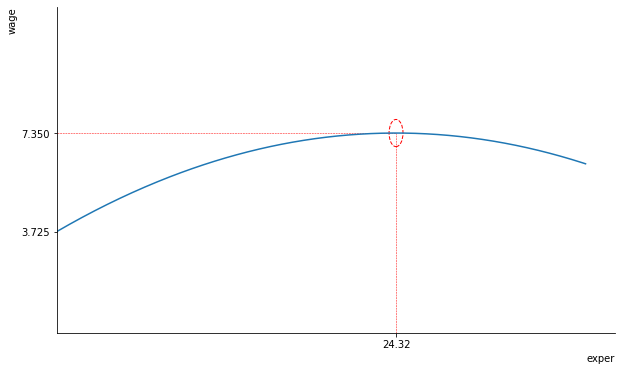

In [11]:
x = np.arange(0, 38, 0.1)        # gera a sequencia: 0, 0.1 ,0.2, 0.3, ..., 37.9
y = [wage.subs({exper: i}) for i in x] # Valores para "wage" quando "exper" assume os valores da variável "x" acima

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylim(0, 12)
plt.xlim(0, 40)
plt.xticks(ticks=[exper_max])
plt.yticks(ticks=[float(wage.subs({exper: 0})), float(wage_max)])
plt.xlabel('exper', loc='right')
plt.ylabel('wage', loc='top')
plt.vlines(x=exper_max, ymin=0, ymax=float(wage_max), linestyles='--', color='red',linewidth=0.5)
plt.hlines(y=float(wage_max), xmin=0, xmax=exper_max, linestyles='--', color='red',linewidth=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.add_patch(ptc.Circle((exper_max, float(wage_max)), radius=0.5, edgecolor='red', linestyle='--', fill=False))
plt.show()

In [12]:
# Porcentagem de pessoas na amostra com mais de 24 anos de experiência
filtro = df['exper'] > 24
porcentagem = 100 * (filtro.sum() / df['exper'].count())
porcentagem

27.9467680608365

### Nota sobre List Comprehension

In [13]:
lista = []
for i in [1, 2, 3, 4]:
    lista.append(i**2)

lista

[1, 4, 9, 16]

In [14]:
# Este comando gera a mesma lista da célula acima (list comprehension)
[i**2 for i in [1, 2, 3, 4]]

[1, 4, 9, 16]

### Notas sobre alguns comandos do sympy

In [15]:
# cria as variáveis "x" e "z" como se fossem variáveis matemáticas (assumindo valores no conjunto dos números reais)
x, z = sp.symbols('x, z', real=True)

In [16]:
# cria "y" como uma "função de x"
y = x**3 - 3*x + z
y

x**3 - 3*x + z

In [17]:
# encontra o valor de y para x = -2 e z = 3
y.subs({x: -2, z: 3})

1

In [18]:
# Encontra a derivada parcial de y em relação à x
dy_dx = y.diff(x)
dy_dx

3*x**2 - 3

In [19]:
# Encontra o valor de x para que "dy_dx = 0" ; sendo dy_dx = 3x**2 - 3
sp.solvers.solve(dy_dx, symbols=x, dict=True)

[{x: -1}, {x: 1}]

### Execução da regressão de MQO sem a criação da variável "expersq"

In [20]:
modelo_1 = smf.ols(formula='wage ~ exper + np.square(exper)', data=df)
reg_1 = modelo_1.fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     26.74
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           8.77e-12
Time:                        16:45:05   Log-Likelihood:                -1407.5
No. Observations:                 526   AIC:                             2821.
Df Residuals:                     523   BIC:                             2834.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7254      0.346     10.769      0.000       3.046       4.405
exper                0.2981      0.041      7.277      0.000       0.218       0.379
np.square(exper)    -0.0061      0.001     -6.792      0.000      -0.008      -0.004
==============================================================================
Omnibus:                      203.746   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.819
Skew:                           1.806   Prob(JB):                    1.82e-157
Kurtosis:                       7.460   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""